<a href="https://colab.research.google.com/github/christyesmee/cnn-sign-language/blob/main/Final_model_with_canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Version: Image Preprocessing Model with the application of Canny filter



## Import Dataset

In [ ]:
# Upload configuration file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
# lib for load data from kaggle
import zipfile
import os

os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet

asl-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle datasets download -d ruslanbredun/sign-language-eng-alphabet

sign-language-eng-alphabet.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extract the ds 1
zip_ref = zipfile.ZipFile('asl-alphabet.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
# Extract the ds 2
zip_ref = zipfile.ZipFile('sign-language-eng-alphabet.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
# Extract the number of instances in each class in DS1
print('The number of instances in each class of the DS1: ',len(os.listdir('/content/asl_alphabet_train/asl_alphabet_train/A')))


The number of instances in each class of the DS1:  3000


In [ ]:
# Extract the number of instances in each class in DS2
print('The number of instances in each class of the DS2: ',len(os.listdir('/content/Images/A')))

The number of instances in each class of the DS2:  1000


##Import Library

In [ ]:
# Load Data
import cv2
import numpy as np
import pandas as pd

# Statistics
from scipy.stats import sem

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Filter
from PIL import Image
import glob
import os
import requests

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
# Save the link of dataset
dir_1 = '/content/asl_alphabet_train/asl_alphabet_train'
dir_2 = '/content/Images'

# Define mutual classes between 2 datasets

In [ ]:
# All the overlapped classes between 2 datasets
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y']

# Transform Images into Vectors

In [ ]:
# Tranform image into vector
def labelToVectorForDS1(dir) :
  images = []
  labels = []
  for i in range(24):
    print("Obtaining images of", classes[i], "....")
    for image in os.listdir(dir + "/" + classes[i]) :
      img = cv2.imread(dir + "/" + classes[i] + "/" + image)
      # resize img
      img = cv2.resize(img, (32,32))
      # turn into grayscale
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      # add a Gaussian Blur
      img2 = cv2.GaussianBlur(gray,(3,3),0)
      img3 = (2*gray)-img2
      # detect the edge
      edges = cv2.Canny(image=img3, threshold1=70, threshold2=70)
      # apply dilation and closing
      kernel = np.ones((5,5),np.uint8)
      dilation = cv2.dilate(edges,kernel,iterations = 1)
      closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
      # add processed image into dataset with its corresponding label
      images.append(closing)
      labels.append(i)
  return images, labels

print("Exracting dataset 1....")
X1, y1 = labelToVectorForDS1(dir_1)

Exracting dataset 1....
Obtaining images of A ....
Obtaining images of B ....
Obtaining images of C ....
Obtaining images of D ....
Obtaining images of E ....
Obtaining images of F ....
Obtaining images of G ....
Obtaining images of H ....
Obtaining images of I ....
Obtaining images of K ....
Obtaining images of L ....
Obtaining images of M ....
Obtaining images of N ....
Obtaining images of O ....
Obtaining images of P ....
Obtaining images of Q ....
Obtaining images of R ....
Obtaining images of S ....
Obtaining images of T ....
Obtaining images of U ....
Obtaining images of V ....
Obtaining images of W ....
Obtaining images of X ....
Obtaining images of Y ....


In [ ]:
# Different from labelToVectorForDS1:
# hyperparameters of edge detection filter
# threshold 1 = 60 and threshold2 = 60
def labelToVectorForDS2(dir) :
  images = []
  labels = []
  for i in range(24):
    print("Obtaining images of", classes[i], "....")
    for image in os.listdir(dir + "/" + classes[i]) :
      img = cv2.imread(dir + "/" + classes[i] + "/" + image)
      # resize image
      img = cv2.resize(img, (32,32))
      # transform into grayscale
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      # apply Gaussian blur
      img2 = cv2.GaussianBlur(gray,(3,3),0)
      img3 = (2*gray)-img2
      # detect edges
      edges = cv2.Canny(image=img3, threshold1=60, threshold2=60)
      # apply only closing
      kernel = np.ones((5,5),np.uint8)
      closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
      # add processed image into dataset
      images.append(closing)
      labels.append(i)
  return images, labels

print("Exracting dataset 2....")
X2, y2 = labelToVectorForDS2(dir_2)

Exracting dataset 2....
Obtaining images of A ....
Obtaining images of B ....
Obtaining images of C ....
Obtaining images of D ....
Obtaining images of E ....
Obtaining images of F ....
Obtaining images of G ....
Obtaining images of H ....
Obtaining images of I ....
Obtaining images of K ....
Obtaining images of L ....
Obtaining images of M ....
Obtaining images of N ....
Obtaining images of O ....
Obtaining images of P ....
Obtaining images of Q ....
Obtaining images of R ....
Obtaining images of S ....
Obtaining images of T ....
Obtaining images of U ....
Obtaining images of V ....
Obtaining images of W ....
Obtaining images of X ....
Obtaining images of Y ....


### Explanation
The reason for the difference in setting is that each dataset is captured under a different condition. One would have a thicker line compared to the other; thus, the different configurations in egde-detection filter would not lose many details with images having a thinner line or taken under a high intensity of light

In [ ]:
# The total number of instances in the training set
print("The total number of instances in the training set:", len(X1))

The total number of instances in the training set: 72000


# Trials in DS1
It would give a particular look on how the sequences of filters affect the image

(-0.5, 199.5, 199.5, -0.5)

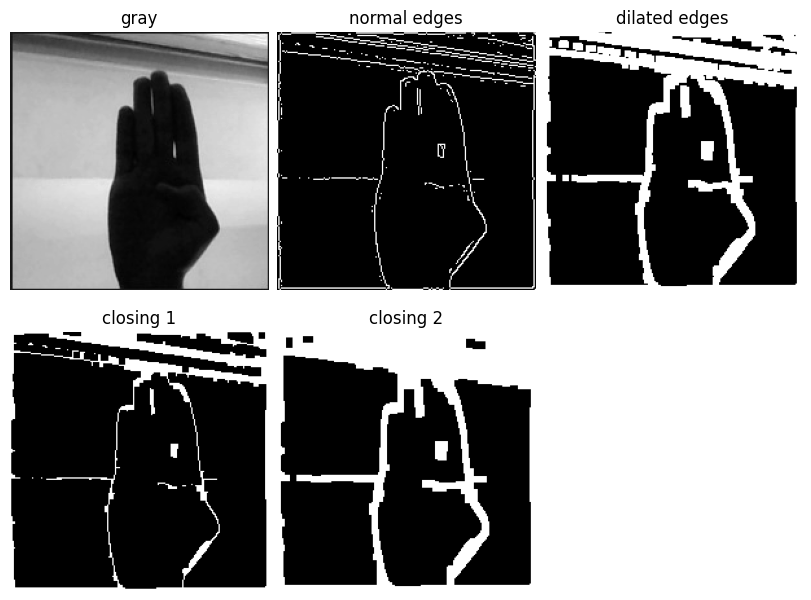

In [ ]:
# derive a random img
img = cv2.imread("/content/asl_alphabet_train/asl_alphabet_train/B/B1.jpg")

# turn it into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# add Gaussian blur
img2 = cv2.GaussianBlur(gray,(3,3),0)
img3 = (2*gray)-img2

# apply Canny filter for edge detection
edges = cv2.Canny(image=img3, threshold1=70, threshold2=70)

# apply dilation and closing
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
closing1 = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel) # closing filter 1
closing2 = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel) # closing filter 2

# visualization
plt.figure(figsize=(8,6), constrained_layout=True)
plt.subplot(231)
plt.imshow(gray, cmap='gray')
plt.title('gray')
plt.axis("off")

plt.subplot(232)
plt.imshow(edges, cmap='gray')
plt.title('normal edges')
plt.axis("off")

plt.subplot(233)
plt.imshow(dilation, cmap='gray')
plt.title('dilated edges')
plt.axis("off")

plt.subplot(234)
plt.imshow(closing1, cmap='gray')
plt.title('closing 1')
plt.axis("off")

plt.subplot(235)
plt.imshow(closing2, cmap='gray')
plt.title('closing 2')
plt.axis("off")


# Trials in Dataset 2

(-0.5, 223.5, 223.5, -0.5)

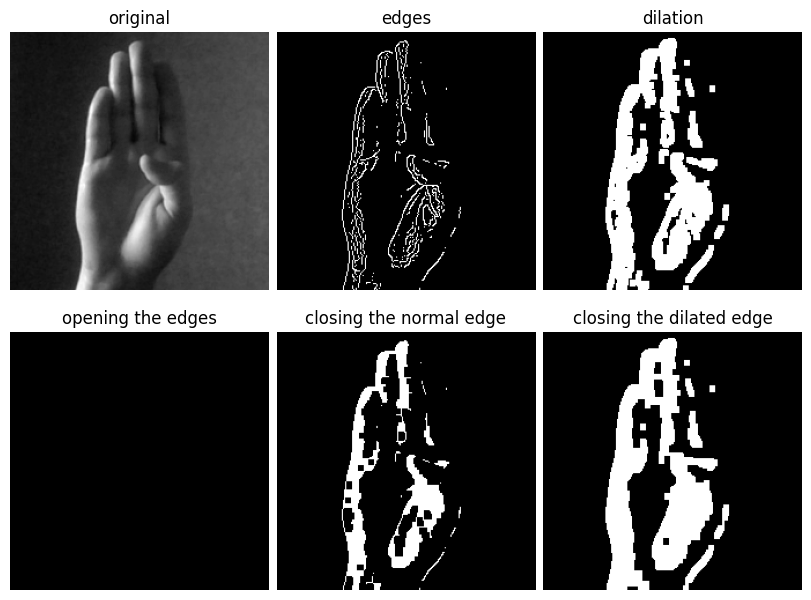

In [ ]:
# read one arbitrary image
img = cv2.imread('/content/Images/B/B_0.png')

# turn to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur image
img2 = cv2.GaussianBlur(gray,(3,3),0)
img3 = (2*gray)-img2

# set up hyperparameters for Canny filter
edges = cv2.Canny(image=gray, threshold1=60, threshold2=60)
kernel = np.ones((5,5),np.uint8)

# dilate the edge by 1 iterations
dilation = cv2.dilate(edges,kernel,iterations = 1)

# opening the edge
opening1 = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel)

# closing small holes inside the edge
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
closing2 = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)

# visualization
plt.figure(figsize=(8,6), constrained_layout=True)
plt.subplot(231)
plt.imshow(gray, cmap='gray')
plt.title('original')
plt.axis("off")

plt.subplot(232)
plt.imshow(edges, cmap='gray')
plt.title('edges')
plt.axis("off")

plt.subplot(233)
plt.imshow(dilation, cmap='gray')
plt.title('dilation')
plt.axis("off")

plt.subplot(234)
plt.imshow(opening1, cmap='gray')
plt.title('opening the edges')
plt.axis("off")

plt.subplot(235)
plt.imshow(closing, cmap='gray')
plt.title('closing the normal edge')
plt.axis("off")

plt.subplot(236)
plt.imshow(closing2, cmap='gray')
plt.title('closing the dilated edge')
plt.axis("off")

# Split Datasets

With the aim to test whether the model would be overfitting on the testing set, we would train only in DS1 and test only in DS2.

In [ ]:
# encode the label into binary encoding vector
def encodingVector(labels):
  onehot_encoded = list()
  for value in labels:
    letter = [0.0 for _ in range(24)]
    # put 1.0 in k-th position where value is in classes
    letter[value] = 1.0
    onehot_encoded.append(letter)
  return np.array(onehot_encoded)


def preprocess_data(x_train, y_train, testsize):
    np_X = np.array(x_train)
    # normalization
    normalised_X = np_X.astype('float32') / 255.0
    # encode label
    label_encoded_y = encodingVector(y_train)
    # Split into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size=testsize)

    return x_train, x_test, y_train, y_test



In [ ]:
# Training on DS1
x_train1, x_test1, y_train1, y_test1 = preprocess_data(X1, y1, 0.2)

In [ ]:
# Testing on DS2
x_train2, x_test2, y_train2, y_test2 = preprocess_data(X2, y2, 0.4)

# Traing model

Method: Training in Dataset 1 and Testing in Dataset 2

Reason: The dataset have no variations in backgrounds and hand details. Testing in another set would prove whether the model is overfitting in testing set.

In [ ]:
#Initialize some parameters
classes = 24
batch = 32
epochs = 10
learning_rate = 0.001

In [ ]:
model = Sequential()
# Basic structure contains 1 Convolution layer with ReLU activation function, 1 Max Pooling, 1 optional Batch Normalization, and Flattern layer
# The input shape should be 32, 32, 1. This is because the data is grayscale and only has one channel.
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
# ANN contains 3 hidden layer with 1 Dropout, 1 ReLU, and 1 Softmax for classification
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))


In [ ]:
adam = Adam(learning_rate=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dropout (Dropout)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [ ]:
history = model.fit(x_train1, y_train1, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/10
1440/1440 [==============================] - 22s 8ms/step - loss: 1.8075 - accuracy: 0.4442 - val_loss: 1.5531 - val_accuracy: 0.5077
Epoch 2/10
1440/1440 [==============================] - 10s 7ms/step - loss: 1.3741 - accuracy: 0.5548 - val_loss: 1.9652 - val_accuracy: 0.4420
Epoch 3/10
1440/1440 [==============================] - 11s 8ms/step - loss: 1.2466 - accuracy: 0.5966 - val_loss: 1.5767 - val_accuracy: 0.5305
Epoch 4/10
1440/1440 [==============================] - 10s 7ms/step - loss: 1.1603 - accuracy: 0.6255 - val_loss: 1.3660 - val_accuracy: 0.5731
Epoch 5/10
1440/1440 [==============================] - 10s 7ms/step - loss: 1.0902 - accuracy: 0.6476 - val_loss: 1.4196 - val_accuracy: 0.5677
Epoch 6/10
1440/1440 [==============================] - 10s 7ms/step - loss: 1.0271 - accuracy: 0.6676 - val_loss: 1.3951 - val_accuracy: 0.5736
Epoch 7/10
1440/1440 [==============================] - 10s 7ms/step - loss: 0.9742 - accuracy: 0.6865 - val_loss: 1.4192 - val_ac

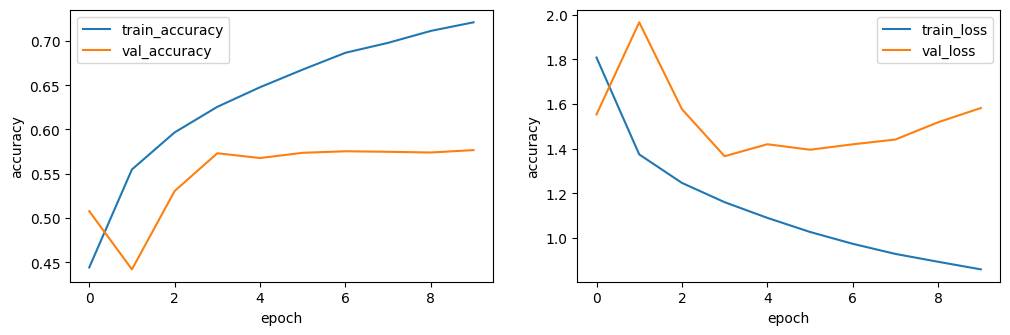

In [ ]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()



plot_results(model)

#Evaluating the model

In [ ]:
  test_loss, test_acc = model.evaluate(x_test2, y_test2)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)

300/300 [==============================] - 1s 3ms/step - loss: 163.9749 - accuracy: 0.0531
Test accuracy: 0.05312500149011612
Test loss: 163.9748992919922


In [ ]:
accuracy = []
for i in range(100):
  x_train2, x_test2, y_train2, y_test2 = preprocess_data(X2, y2, 0.4)
  test_loss, test_acc = model.evaluate(x_test2, y_test2)
  accuracy.append(test_acc)



300/300 [==============================] - 1s 3ms/step - loss: 163.3343 - accuracy: 0.0500


In [ ]:
def statistics(accuracy):
  # accuracy is a List of the test accuracy over 1 split on ds2
  return np.average(accuracy), sem(accuracy)
print("The mean, and standard errors of canny filter over 100 rounds")
print(statistics(accuracy))

The mean, and standard errors of canny filter over 100 rounds
(0.051222916431725024, 0.0001811350562146635)


In [ ]:
# predict img in test set
y_predict = model.predict(x_test2)
y_predict = np.argmax(y_predict, axis=1)
y_test2   = np.argmax(y_test2, axis=1)

# create confustion matrix
cm = confusion_matrix(y_test2, y_predict)


300/300 [==============================] - 1s 2ms/step


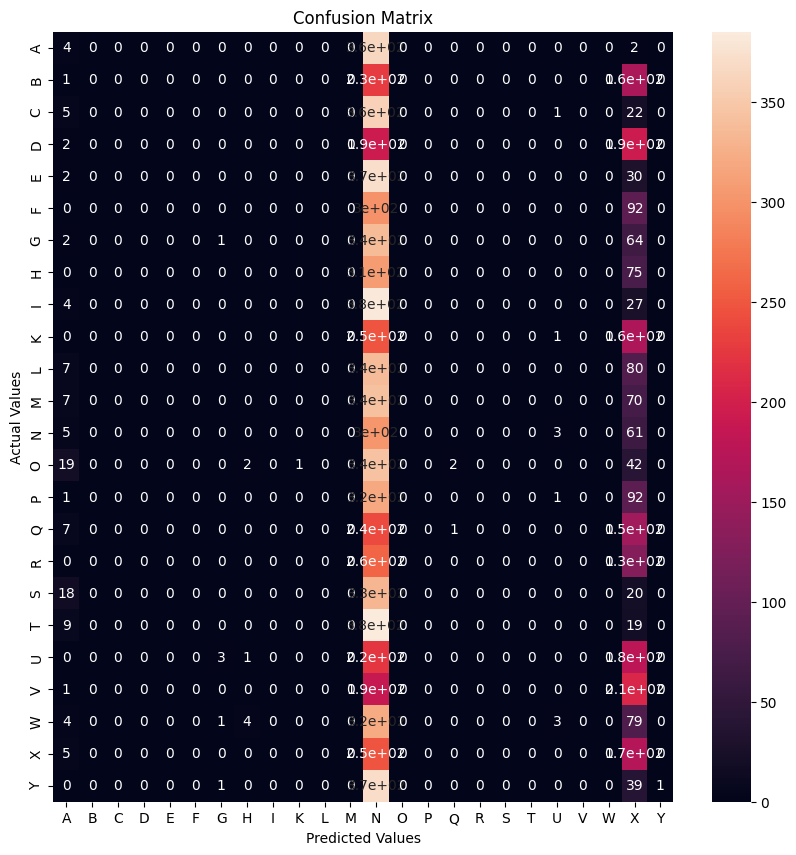

<Figure size 640x480 with 0 Axes>

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y']

cm_df = pd.DataFrame(cm,index=classes, columns=classes) #Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
plt.savefig("cm.png")

In [ ]:
print(classification_report(y_test2, y_predict, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

           A       0.04      0.01      0.02       370
           B       0.00      0.00      0.00       391
           C       0.00      0.00      0.00       387
           D       0.00      0.00      0.00       388
           E       0.00      0.00      0.00       404
           F       0.00      0.00      0.00       390
           G       0.17      0.00      0.00       403
           H       0.00      0.00      0.00       382
           I       0.00      0.00      0.00       413
           K       0.00      0.00      0.00       412
           L       0.00      0.00      0.00       424
           M       0.00      0.00      0.00       419
           N       0.04      0.81      0.08       371
           O       0.00      0.00      0.00       409
           P       0.00      0.00      0.00       414
           Q       0.33      0.00      0.00       402
           R       0.00      0.00      0.00       387
           S       0.00    

# **Explanation**

We will examine some situation why

*   All signs are predicted as N
*   Similarity between (N,E) and (N,S) because these pairs created the most False values

We will plot the processed image of N,E,S and make a judgement based on the reality



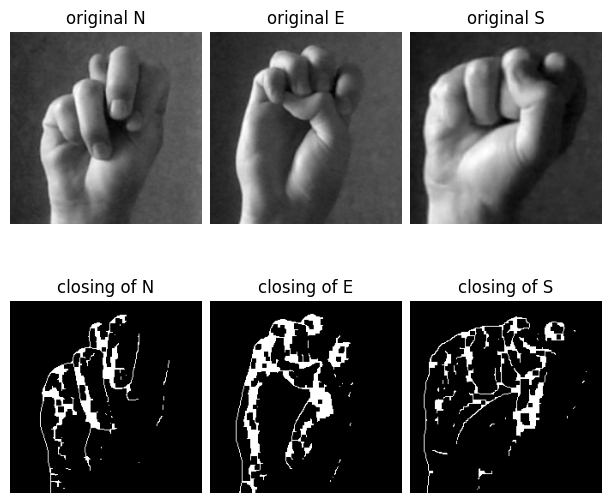

In [ ]:
n = cv2.imread('/content/Images/N/N_0.png')
e = cv2.imread('/content/Images/E/E_0.png')
s = cv2.imread('/content/Images/S/S_0.png')
lst = [n,e,s]
alphabet = ["N","E","S"]

plt.figure(figsize=(6,8), constrained_layout=True)
for i in range(3):
  gray = cv2.cvtColor(lst[i], cv2.COLOR_BGR2GRAY)
  img2 = cv2.GaussianBlur(gray,(3,3),0)
  img3 = (2*gray)-img2
  edges = cv2.Canny(image=gray, threshold1=60, threshold2=60)
  kernel = np.ones((5,5),np.uint8)
  closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
  plt.subplot(3,3,i+1)
  plt.imshow(gray, cmap='gray')
  plt.title('original '+alphabet[i])
  plt.axis("off")
  plt.subplot(3,3,i+4)
  plt.imshow(closing, cmap='gray')
  plt.title('closing of '+alphabet[i])
  plt.axis("off")
  plt.savefig("figure.png", bbox_inches='tight')

By visual judgment, these figures are largely similar, even for human being. Thus, it leads to the major mistakes of the model in classifiying all sign that have a holding shape as N